# 데이터 분석

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

# meta 데이터와 annotation 데이터 불러오기
meta_data = pd.read_csv("meta.csv")
anno_data = pd.read_csv("anno.csv")

In [2]:
# meta_data 형태 확인
meta_data.shape

(37226, 38)

In [3]:
# annotation_data 형태 확인
anno_data.shape

(592166, 13)

In [4]:
# meta_data 5개 확인
meta_data.head()

,filename,parent_path,unix_timestamp,file_format,capacity,vehicle_id,region_name,location,length,framerate,...,gps_mode,gps_latitude,gps_longitude,long_velocity,lat_velocity,long_accel,lat_accel,yaw,roll,pitch
0,1659488353459_FR-View-CMR-Wide.png,/batch_10/20220803/2022-08-03_09-59-08_ADCV1-A...,1659488353459,png,2.26,AIMMO-ADCV1,서울 송파구,장지동 564,10,30,...,other,37.471104,127.126913,15.08,-0.20,0.49,1.18,39.97,358.80,2.44
1,1660708329667_FR-View-CMR-Wide.png,/batch_11/20220817/2022-08-17_12-52-09_ADCV1-A...,1660708329667,png,2.62,AIMMO-ADCV1,인천 서구,연희동 428-243,25,30,...,none,37.545095,126.650443,41.90,6.88,0.37,-0.42,89.92,1.02,1.77
2,1656148479046_RR-Right-View-CMR-Narrow.png,/batch_5/20220625/2022-06-25_18-14-35_ADCV1-AD...,1656148479062,png,2.55,AIMMO-ADCV1,서울 광진구,군자동 489,7,30,...,rtk_float,37.557473,127.076682,10.75,0.46,0.40,1.24,92.40,0.33,2.56
3,1656985454289_FR-View-CMR-Wide.png,/batch_7/20220705/2022-07-05_10-44-09_ADCV1-AD...,1656985454289,png,2.11,AIMMO-ADCV1,경기 성남시 수정구,수진동 4161,7,30,...,rtk_float,37.436431,127.129982,11.61,-0.27,0.78,0.69,211.64,0.13,2.52
4,1656980437050_FR-View-CMR-Wide.png,/batch_7/20220705/2022-07-05_09-20-33_ADCV1-AD...,1656980437050,png,1.87,AIMMO-ADCV1,경기 성남시 분당구,삼평동 638,12,30,...,rtk_float,37.399180,127.109869,29.48,0.13,0.44,-0.05,270.49,1.11,3.17


In [5]:
# annotation_data 5개 확인
anno_data.head()

,id,type,label,attribute,points,trackId,occlusion,truncation,scenario,isfake,ismask,area,filename
0,2-28137ee3-f29c-45aa-8294-c7a0fdc01af8,bbox,traffic_sign,traffic_sign,"[[248, 521], [275, 521], [275, 563], [248, 563]]",-1,0,0,0,0,0,1134,1659488353459_FR-View-CMR-Wide.png
1,3-623a3ae9-0401-49b4-9b66-613967485c5f,bbox,traffic_light,traffic_light,"[[279, 560], [327, 560], [327, 579], [279, 579]]",-1,0,0,0,0,0,912,1659488353459_FR-View-CMR-Wide.png
2,4-63a16fb2-f6b7-415e-a65c-fb54c459ed5b,bbox,traffic_light,traffic_light,"[[186, 574], [228, 574], [228, 588], [186, 588]]",-1,0,0,0,0,0,588,1659488353459_FR-View-CMR-Wide.png
3,6-777d62dd-51db-44cc-a39e-84fa9a6ef4c4,bbox,traffic_light,traffic_light,"[[404, 722], [419, 722], [419, 758], [404, 758]]",-1,0,0,0,0,0,540,1659488353459_FR-View-CMR-Wide.png
4,7-9d5db2cb-2c19-472f-be8a-79b686f78917,bbox,vehicle,car,"[[435, 797], [551, 797], [551, 834], [435, 834]]",-1,1,0,0,0,0,4292,1659488353459_FR-View-CMR-Wide.png


In [6]:
# meta_data 결측치 확인
meta_data[meta_data.isna()].value_counts()

Series([], dtype: int64)

In [7]:
# annotation_data 결측치 확인
anno_data[anno_data.isna()].value_counts()

Series([], dtype: int64)

## meta_data 분석

In [8]:
# 이미지 size 확인
meta_data['size'].value_counts()

1920*1024    36285
1024*1920      941
Name: size, dtype: int64

In [9]:
# 데이터 목적 확인
meta_data['data_purpose'].value_counts()

train    37226
Name: data_purpose, dtype: int64

In [10]:
# 날씨 확인
meta_data['weather'].value_counts()

sunny     23331
cloudy    13895
Name: weather, dtype: int64

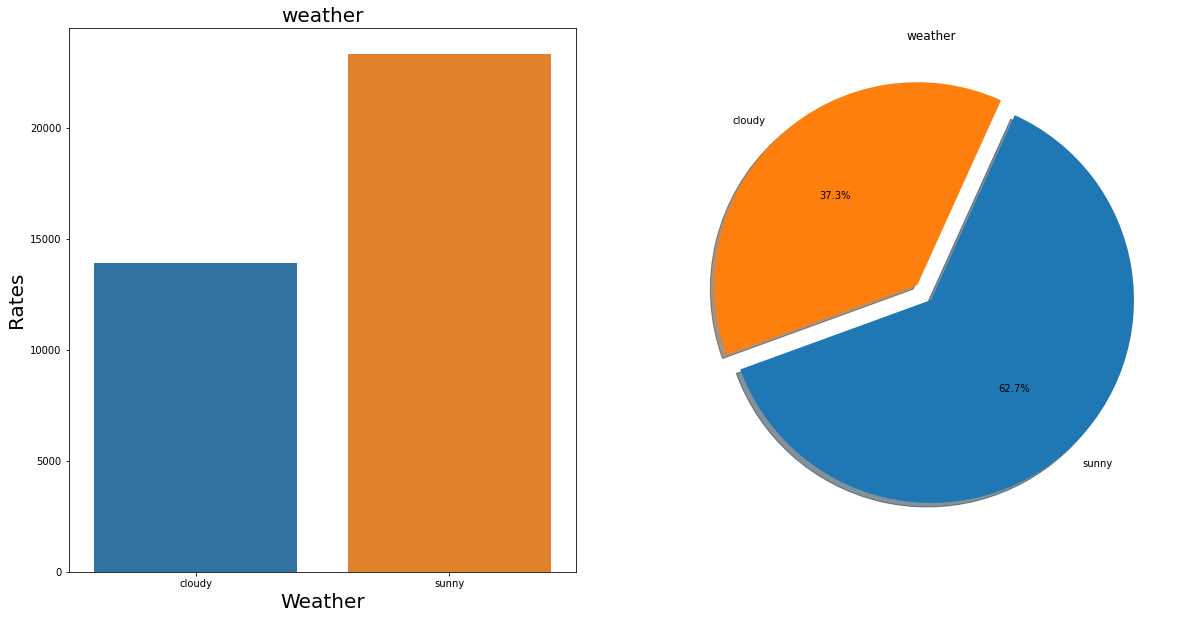

In [11]:
# 날씨 데이터에 대한 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.countplot(x = 'weather', data = meta_data)
plt.title('weather',fontsize =20)
plt.xlabel('Weather',fontsize = 20)
plt.ylabel('Rates',fontsize = 20)

plt.subplot(1, 2, 2)
meta_data['weather'].value_counts().plot.pie(autopct='%.1f%%', startangle=200, explode=(0,0.1), shadow=True, ylabel=(''))
plt.title('weather')

plt.show()

In [12]:
# 도로 특징 확인
meta_data['road_feature'].value_counts()

r_cityroad      30632
r_expressway     6575
rest_inout         19
Name: road_feature, dtype: int64

In [13]:
# 도로 타입 확인
meta_data['road_type'].value_counts()

intersection        20629
normal              15108
overpass             1284
underground_road      205
Name: road_type, dtype: int64

In [14]:
# 위치 특징 확인
meta_data['location_feature'].value_counts().sort_index()

child_protect      804
construction      1069
crosswalk          521
interchange        787
other            29594
parkinglot         172
structure         3594
tollgate            99
tunnel             586
Name: location_feature, dtype: int64

In [15]:
# 운전 상황 확인
meta_data['driving_scenario'].value_counts()

lane_following    19767
u_turn             4978
right_turn         4896
left_turn          4064
lane_change_sv     3521
Name: driving_scenario, dtype: int64

In [16]:
# 운전 속도 확인
meta_data['ego_long_vel_level'].value_counts()

low       23402
middle    10119
stop       2735
high        970
Name: ego_long_vel_level, dtype: int64

In [17]:
# 조도(빛) 상태 확인
meta_data['illumination_status'].value_counts()

normal           36216
backlight_sun     1010
Name: illumination_status, dtype: int64

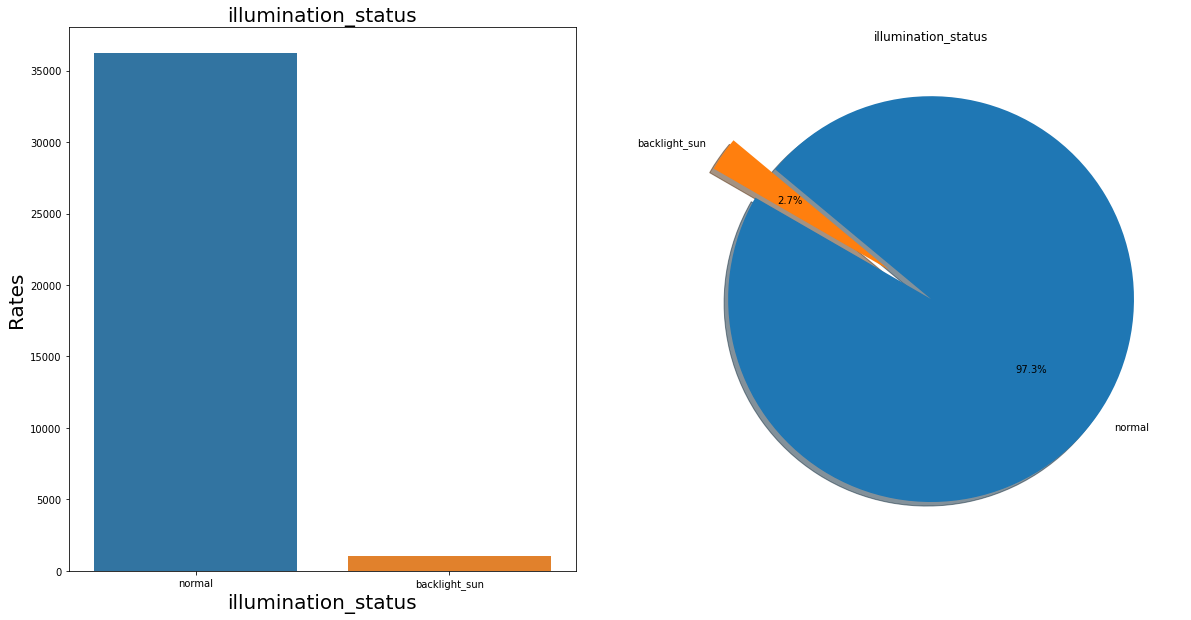

In [18]:
# 조도(빛) 상태 데이터에 대한 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.countplot(x = 'illumination_status', data = meta_data)
plt.title('illumination_status',fontsize =20)
plt.xlabel('illumination_status',fontsize = 20)
plt.ylabel('Rates',fontsize = 20)

plt.subplot(1, 2, 2)
meta_data['illumination_status'].value_counts().plot.pie(autopct='%.1f%%', startangle=150, explode=(0,0.25), shadow=True, ylabel=(''))
plt.title('illumination_status')

plt.show()

In [19]:
# 도로 상태 확인
meta_data['road_status'].value_counts()

dry    33417
wet     3809
Name: road_status, dtype: int64

In [20]:
# 객체 수 확인
meta_data['crowd_level'].value_counts()

high      22623
middle    11581
low        3022
Name: crowd_level, dtype: int64

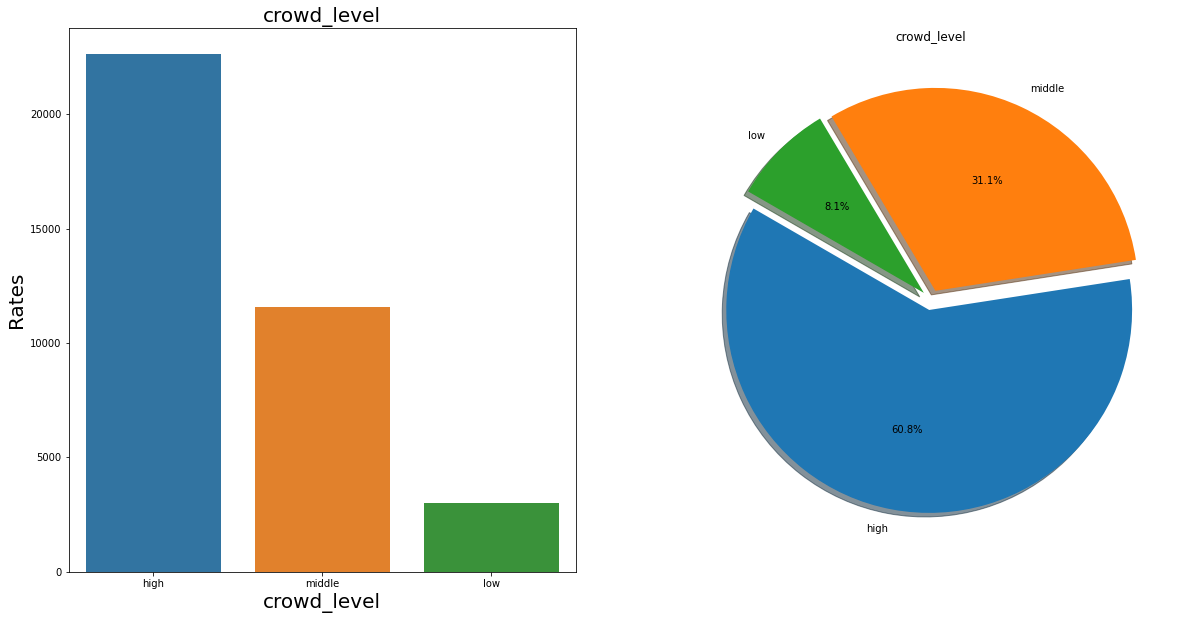

In [21]:
# 객체 수 데이터에 대한 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.countplot(x = 'crowd_level', data = meta_data)
plt.title('crowd_level',fontsize =20)
plt.xlabel('crowd_level',fontsize = 20)
plt.ylabel('Rates',fontsize = 20)

plt.subplot(1, 2, 2)
meta_data['crowd_level'].value_counts().plot.pie(autopct='%.1f%%', startangle=150, explode=(0.05,0.05,0.05), shadow=True, ylabel=(''))
plt.title('crowd_level')

plt.show()

In [22]:
# 센서 상태 확인
meta_data['sensor_status'].value_counts()

normal                       32598
reflection_from_dashboard     2144
waterdrop                     1618
smear                          861
partialocculusion                5
Name: sensor_status, dtype: int64

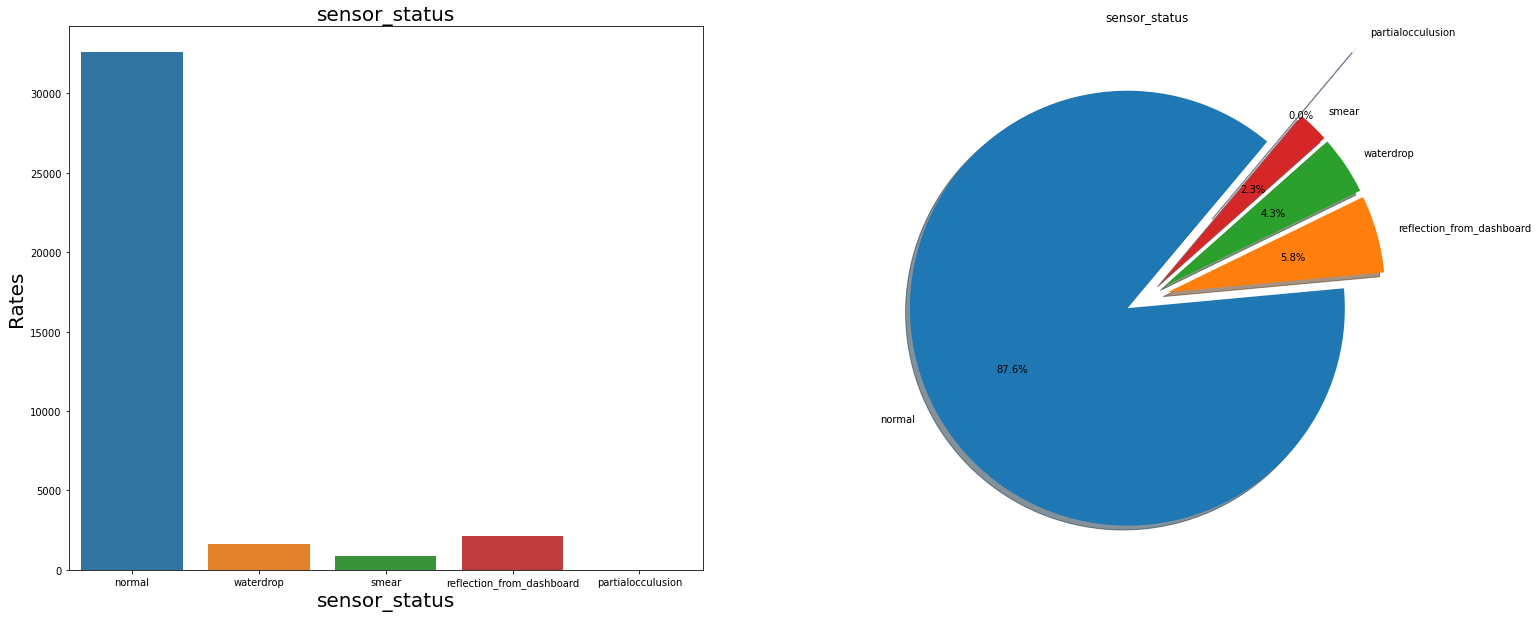

In [23]:
# 센서 상태 데이터에 대한 시각화
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.countplot(x = 'sensor_status', data = meta_data)
plt.title('sensor_status',fontsize =20)
plt.xlabel('sensor_status',fontsize = 20)
plt.ylabel('Rates',fontsize = 20)

plt.subplot(1, 2, 2)
meta_data['sensor_status'].value_counts().plot.pie(autopct='%.1f%%', startangle=50, explode=(0.1,0.1,0.1,0.1,0.5), shadow=True, ylabel=(''))
plt.title('sensor_status')

plt.show()

## annotation_data 분석

In [25]:
# label 확인
anno_data['label'].value_counts()

vehicle           283085
traffic_sign       69453
car_number         66608
pedestrian         61775
traffic_light      54288
ptw                23318
face               12827
rider              11096
yellow_vehicle      5540
police              1832
movable_object      1593
emergency            395
fire                 239
animal               117
Name: label, dtype: int64

In [26]:
# label 세부 명칭 확인
anno_data['attribute'].value_counts()

car                    201380
adult                   69798
traffic_sign            69453
car_number              66608
traffic_light           54288
truck_s                 33655
truck_l                 24116
bus_l                   20243
pm                      14925
face                    12827
bus_s                    5563
motorcycle               5505
unknown                  3436
trailer                  2816
bicycle                  2332
specialclothes           2037
movable_object           1593
child                    1036
wheelchair_stroller       438
animal                    117
Name: attribute, dtype: int64

In [27]:
# trackId 확인
anno_data['trackId'].value_counts()

-1    592166
Name: trackId, dtype: int64

In [28]:
# occlusion(객체가 가려진 상태)
anno_data['occlusion'].value_counts()

0    353056
1    107187
2     61043
3     51787
4     19093
Name: occlusion, dtype: int64

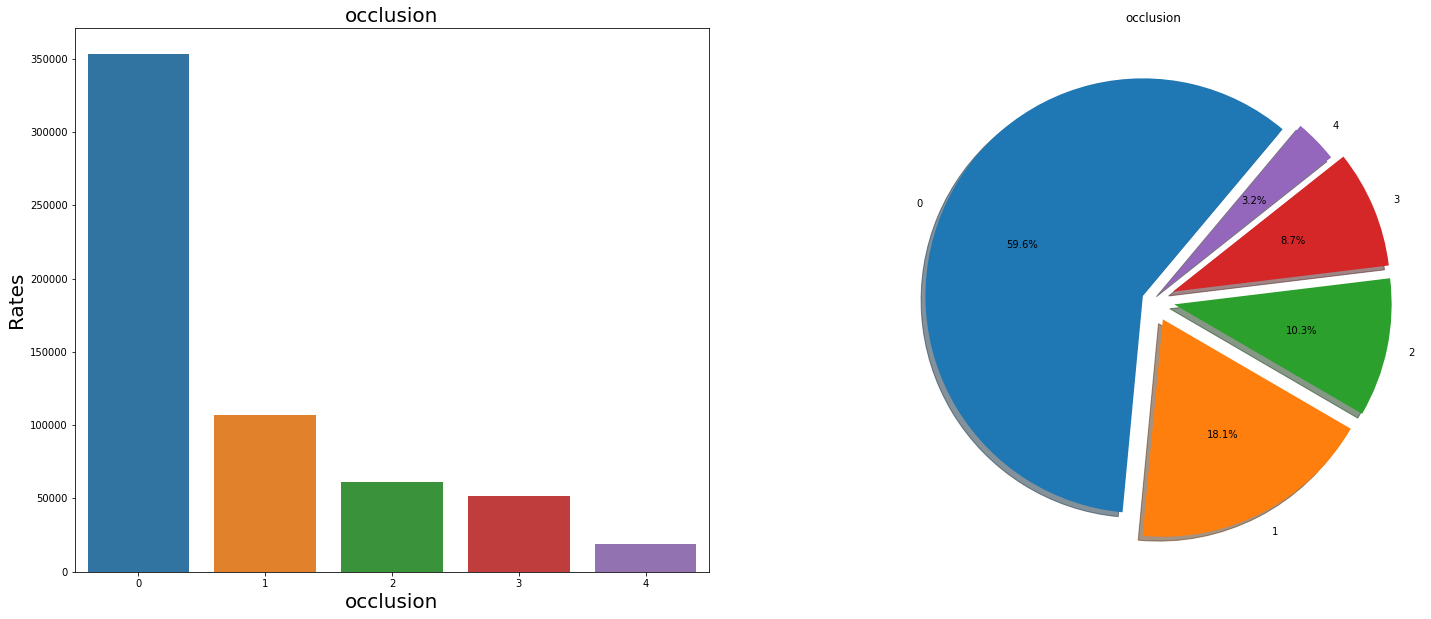

In [29]:
# occlusion(객체가 가려진 상태) 데이터 시각화
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.countplot(x = 'occlusion', data = anno_data)
plt.title('occlusion',fontsize =20)
plt.xlabel('occlusion',fontsize = 20)
plt.ylabel('Rates',fontsize = 20)

plt.subplot(1, 2, 2)
anno_data['occlusion'].value_counts().plot.pie(autopct='%.1f%%', startangle=50, explode=(0.05,0.1,0.1,0.1,0.05), shadow=True, ylabel=(''))
plt.title('occlusion')

plt.show()

In [30]:
# truncation(객체가 잘린 상태) 확인
anno_data['truncation'].value_counts()

0    549621
1     19002
2      9070
3      8604
4      5869
Name: truncation, dtype: int64

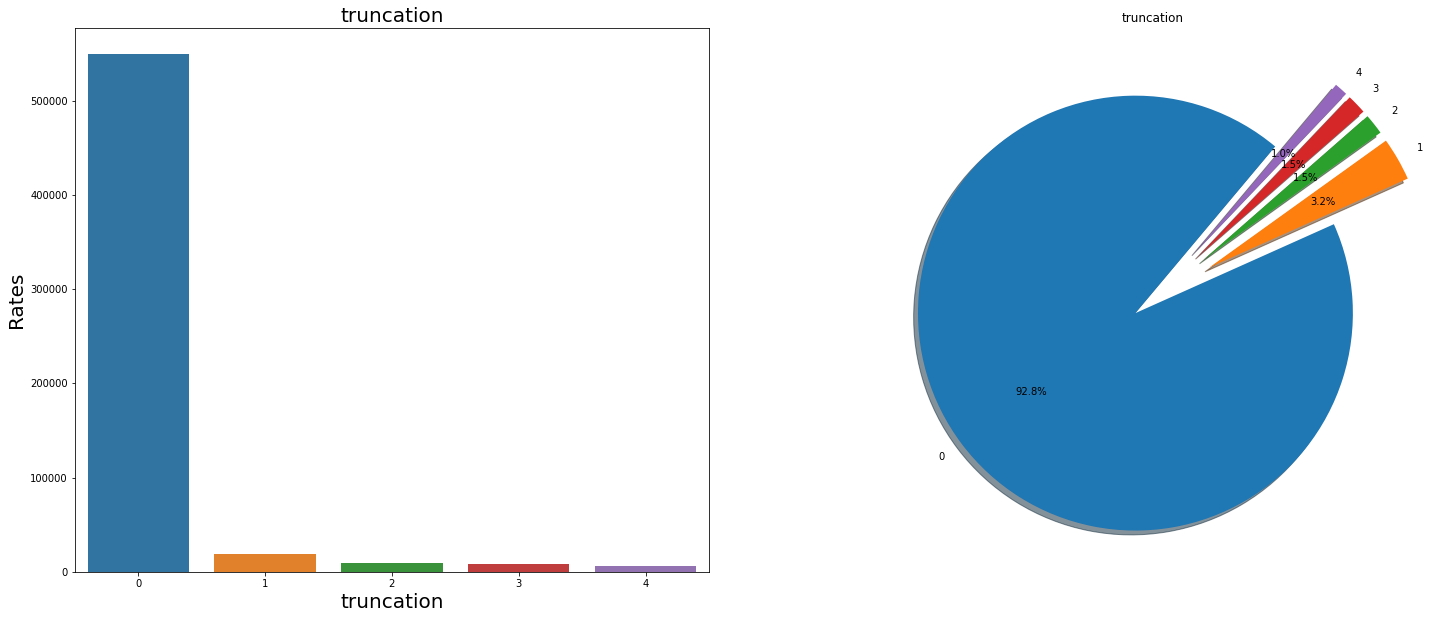

In [31]:
# truncation(객체가 잘린 상태) 데이터 시각화
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.countplot(x = 'truncation', data = anno_data)
plt.title('truncation',fontsize =20)
plt.xlabel('truncation',fontsize = 20)
plt.ylabel('Rates',fontsize = 20)

plt.subplot(1, 2, 2)
anno_data['truncation'].value_counts().plot.pie(autopct='%.1f%%', startangle=50, explode=(0.1,0.3,0.3,0.3,0.3), shadow=True, ylabel=(''))
plt.title('truncation')

plt.show()

In [32]:
# scenario(객체의 거동 시나리오) 확인
anno_data['scenario'].value_counts()

0    592166
Name: scenario, dtype: int64

In [33]:
# isfake(객체의 진위 여부) 확인
anno_data['isfake'].value_counts()

0    586194
1      5972
Name: isfake, dtype: int64

In [34]:
# area(객체의 사이즈) 확인
anno_data['area'].value_counts()

90        2612
144       2296
120       2276
240       2096
168       2032
          ... 
29992        1
176656       1
190026       1
198911       1
44392        1
Name: area, Length: 40720, dtype: int64

In [35]:
# ismask(마스크 착용 여부) 확인
anno_data['ismask'].value_counts()

0    581582
1     10584
Name: ismask, dtype: int64

# 이미지 시각화
---

## isfake = 0 (실제 객체인 것들)

### label = traffic_sign

![nn](스크린샷/traffic_sign_1.png)
![nn](스크린샷/traffic_sign_2.png)

### label = car_number

![nn](스크린샷/car_number_1.png)
![nn](스크린샷/car_number_2.png)

### label = traffic_light

![nn](스크린샷/traffic_light_1.png)
![nn](스크린샷/traffic_light_2.png)

### label = ptw

![nn](스크린샷/ptw_1.png)
![nn](스크린샷/ptw_2.png)
![nn](스크린샷/ptw_3.png)

### label = face

![nn](스크린샷/face_1.png)
![nn](스크린샷/face_2.png)

### label = rider

![nn](스크린샷/rider_1.png)
![nn](스크린샷/rider_2.png)

### label = yellow_vehicle

![nn](스크린샷/yellow_vehicle_1.png)
![nn](스크린샷/yellow_vehicle_2.png)

### label = movable_object

![nn](스크린샷/movable_object_1.png)
![nn](스크린샷/movable_object_2.png)
![nn](스크린샷/movable_object_3.png)

### label = police

![nn](스크린샷/police_1.png)
![nn](스크린샷/police_2.png)

### label = emergency

![nn](스크린샷/emergency_1.png)
![nn](스크린샷/emergency_2.png)

### label = fire

![nn](스크린샷/fire_1.png)
![nn](스크린샷/fire_2.png)

### label = pedestrian

![nn](스크린샷/pedestrian_1.png)

### label = animal

![nn](스크린샷/animal_1.png)
![nn](스크린샷/animal_2.png)

---

## isfake = 1 (실제 객체가 아닌 것들)

### label = vehicle

![nn](스크린샷/fake_vehicle_1.png)
![nn](스크린샷/fake_vehicle_2.png)
![nn](스크린샷/fake_vehicle_3.png)

### label = traffic_sign

![nn](스크린샷/fake_traffic_sign_1.png)
![nn](스크린샷/fake_traffic_sign_2.png)
![nn](스크린샷/fake_traffic_sign_3.png)

### 교통신호판이 맞아보이는데 왜 fake인지 모르겠음..

### label = pedestrian

![nn](스크린샷/fake_pedestrian_1.png)
![nn](스크린샷/fake_pedestrian_2.png)

### label = ptw

![nn](스크린샷/fake_ptw_1.png)
![nn](스크린샷/fake_ptw_2.png)
![nn](스크린샷/fake_ptw_3.png)

### label = rider

![nn](스크린샷/fake_rider_1.png)
![nn](스크린샷/fake_rider_2.png)

### label = animal

![nn](스크린샷/fake_animal_1.png)
![nn](스크린샷/fake_animal_2.png)

---

### attribute = unknown

![nn](스크린샷/unknown_1.png)
![nn](스크린샷/unknown_2.png)

### attribute = trailer

![nn](스크린샷/trailer_1.png)
![nn](스크린샷/trailer_2.png)

### attribute = specialclothes

![nn](스크린샷/specialclothes_1.png)
![nn](스크린샷/specialclothes_2.png)
![nn](스크린샷/specialclothes_3.png)

### attribute = child

![nn](스크린샷/child_1.png)
![nn](스크린샷/child_2.png)

### attribute = wheelchair_stroller

![nn](스크린샷/wheelchair_stroller_1.png)